# Import Libraries

In [34]:
# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import adam
from keras.callbacks import TensorBoard



Using TensorFlow backend.


# Importing the dataset

In [2]:
df_train = pd.read_csv('fashion_mnist_train.csv')
df_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_test = pd.read_csv('fashion_mnist_test.csv')
df_test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
df_train.shape

(60000, 785)

In [5]:
df_test.shape

(10000, 785)

In [6]:
training = np.array(df_train, dtype = 'float32')
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
testing = np.array(df_test, dtype = 'float32')
testing

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

The label is: 6.0


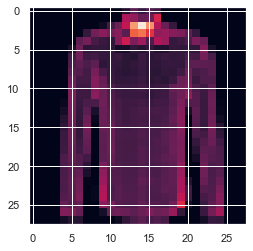

In [8]:
import random
i = random.randint(1, 60000)
plt.imshow(training[i , 1:].reshape(28,28))
label = training[i, 0]
print('The label is:', label)
plt.show()

Wall time: 6.75 s


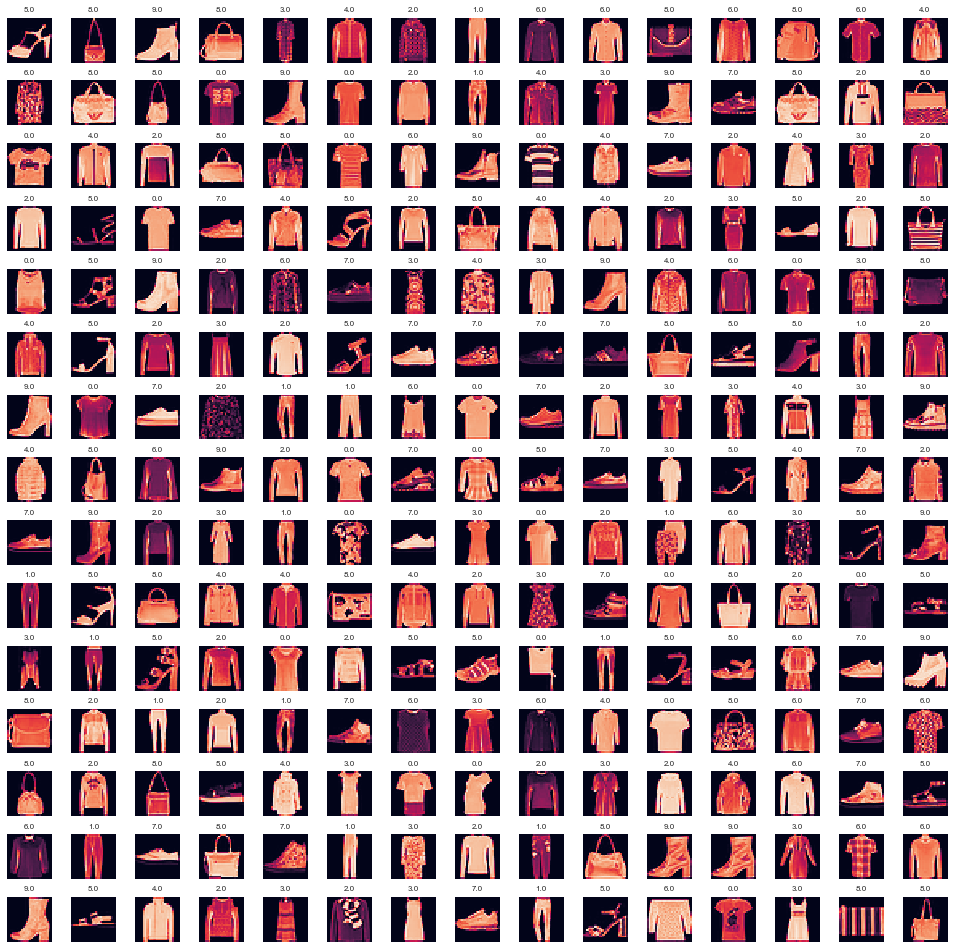

In [9]:
%%time 

L_grid = 15
W_grid = 15

fig, axes = plt.subplots(L_grid, W_grid , figsize = (17,17))
axes = axes.ravel()
n_training = len(training)
for i in np.arange(0, L_grid*W_grid):
    index = random.randint(0, n_training)
    axes[i].imshow(training[index, 1:].reshape(28,28))
    axes[i].set_title(training[index, 0], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace= 0.4)    

# Training the model

In [10]:
X_train = training[:, 1:]/255
y_train = training[:, 0]

X_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [11]:
X_train , X_validation, y_tain , y_validation =train_test_split(X_train, y_train, test_size = 0.2,
                                                               random_state= 42)

In [12]:
X_train.shape

(48000, 784)

In [13]:
X_test.shape

(10000, 784)

In [14]:
X_validation.shape

(12000, 784)

In [15]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validation = X_validation.reshape(X_validation.shape[0], *(28,28,1))

In [16]:
X_train.shape

(48000, 28, 28, 1)

In [17]:
X_test.shape

(10000, 28, 28, 1)

In [18]:
X_validation.shape

(12000, 28, 28, 1)

# Initialising CNN 

In [19]:
Classifier = Sequential()

# Convolution 

In [20]:
Classifier.add(Convolution2D(32, 3, 3, input_shape=(28,28,1), activation='relu' ))

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


# Max Pooling 

In [21]:
Classifier.add(MaxPooling2D(pool_size =(2,2)))

# Flatten

In [22]:
Classifier.add(Flatten())

# Full COnnection

In [23]:
Classifier.add(Dense(units = 32, activation= 'relu'))
Classifier.add(Dense(units = 10, activation= 'sigmoid'))

# Compiling the CNN


In [24]:
Classifier.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

# Fitting the classifier

In [27]:
nb_epochs = 5

Classifier.fit(X_train, y_tain,
               batch_size= 10,
               epochs= nb_epochs,
               verbose= 1,
               validation_data=(X_validation, y_validation)
                )

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 449s 9ms/step - loss: 0.2847 - accuracy: 0.8989 - val_loss: 0.3043 - val_accuracy: 0.8946
Epoch 2/5
48000/48000 [==============================] - 457s 10ms/step - loss: 0.2441 - accuracy: 0.9101 - val_loss: 0.2823 - val_accuracy: 0.8988
Epoch 3/5
48000/48000 [==============================] - 458s 10ms/step - loss: 0.2126 - accuracy: 0.9220 - val_loss: 0.2708 - val_accuracy: 0.9079
Epoch 4/5
48000/48000 [==============================] - 461s 10ms/step - loss: 0.1885 - accuracy: 0.9312 - val_loss: 0.2644 - val_accuracy: 0.9083
Epoch 5/5
48000/48000 [==============================] - 455s 9ms/step - loss: 0.1702 - accuracy: 0.9380 - val_loss: 0.2689 - val_accuracy: 0.9093


# Evaluating the model

In [30]:
evaluate = Classifier.evaluate(X_test, y_test)
print('Test accuracy {:.3f}'.format(evaluate[1]))

10000/10000 [==============================] - 45s 4ms/step
Test accuracy 0.915


In [31]:
predict_classes = Classifier.predict_classes(X_test)
predict_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

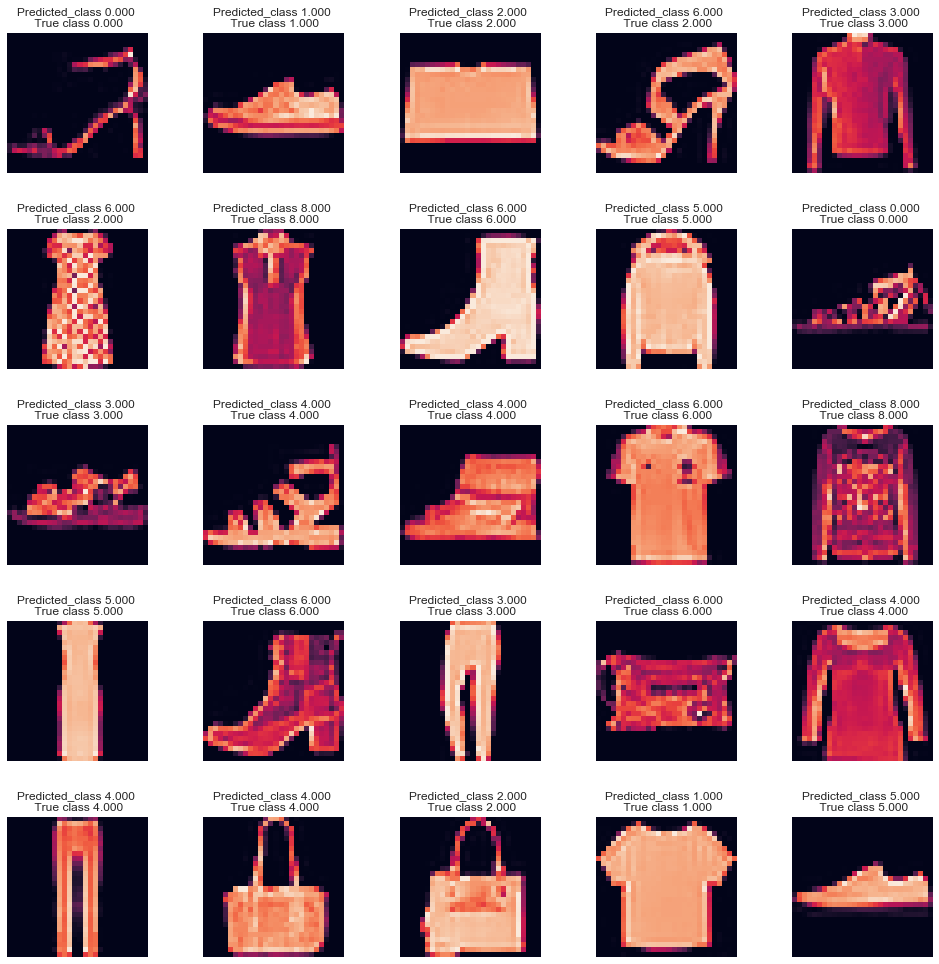

In [33]:
L_grid = 5
W_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17, 17))

axes = axes.ravel()

for i in np.arange(0, L_grid*W_grid):
    axes[i].imshow(X_train[i].reshape(28,28))
    axes[i].set_title('Predicted_class {:.3f} \n True class {:.3f}'.format(predict_classes[i], y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(hspace= 0.4)    

# Confusion matrix 

In [35]:
from sklearn.metrics import confusion_matrix
conf_matrx = confusion_matrix(y_test, predict_classes)
conf_matrx

array([[850,   4,  17,  35,   3,   1,  81,   0,   9,   0],
       [  1, 990,   0,   5,   1,   2,   0,   0,   1,   0],
       [ 12,   1, 850,  10,  72,   1,  51,   0,   3,   0],
       [  9,  14,   3, 941,  16,   0,  17,   0,   0,   0],
       [  0,   1,  33,  30, 877,   1,  54,   0,   4,   0],
       [  0,   1,   0,   0,   0, 977,   0,  12,   2,   8],
       [108,   4,  44,  34,  51,   0, 748,   0,  11,   0],
       [  0,   0,   0,   0,   0,  11,   0, 962,   0,  27],
       [  4,   1,   1,   1,   2,   3,   3,   2, 983,   0],
       [  0,   0,   0,   0,   1,   4,   0,  27,   0, 968]], dtype=int64)

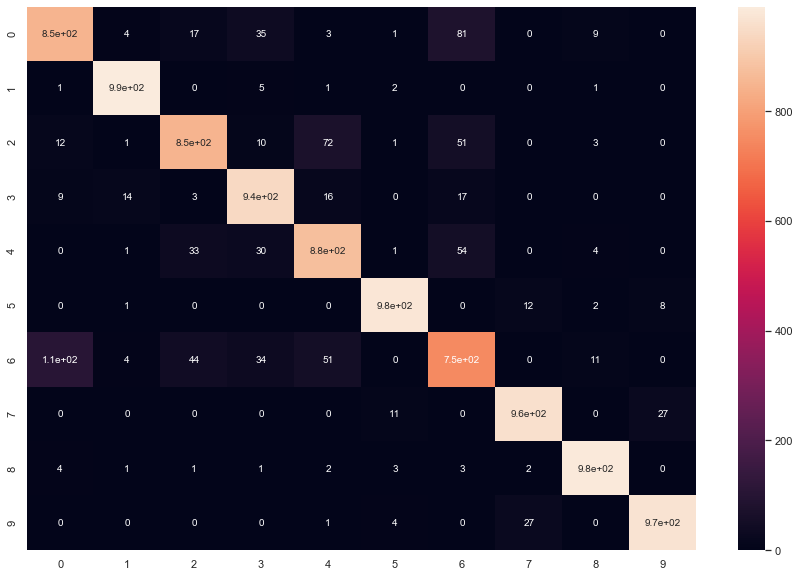

In [39]:
plt.figure(figsize= [15,10])
sns.heatmap(conf_matrx, annot= True)
plt.show()

# Classification report  

In [41]:
from sklearn.metrics import classification_report
class_repo = classification_report(y_test, predict_classes)
print(class_repo)

              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86      1000
         1.0       0.97      0.99      0.98      1000
         2.0       0.90      0.85      0.87      1000
         3.0       0.89      0.94      0.92      1000
         4.0       0.86      0.88      0.87      1000
         5.0       0.98      0.98      0.98      1000
         6.0       0.78      0.75      0.77      1000
         7.0       0.96      0.96      0.96      1000
         8.0       0.97      0.98      0.98      1000
         9.0       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [43]:
# from sklearn.metrics import classification_report

# num_classes = 10
# target_names = ["Class {}".format(i) for i in range(num_classes)]

# print(classification_report(y_test, predict_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.86      0.85      0.86      1000
     Class 1       0.97      0.99      0.98      1000
     Class 2       0.90      0.85      0.87      1000
     Class 3       0.89      0.94      0.92      1000
     Class 4       0.86      0.88      0.87      1000
     Class 5       0.98      0.98      0.98      1000
     Class 6       0.78      0.75      0.77      1000
     Class 7       0.96      0.96      0.96      1000
     Class 8       0.97      0.98      0.98      1000
     Class 9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

